#          Flow visualization over source sheets combined to make a wedge airfoil 

Here, we are aiming to visualize freestream flow over a wedge at different angle of attacks. The approach involves source sheet
method wherein 100 sources are placed all over on each of the 3 sides of the wedge. In the first part of the program, source velocities and free stream velocities are added and the plot is compared with the article on "Inviscid Flow Past a Semi-Infinite Wedge". Now we have a wedge design with sources over it and we can add vortex on each sources in order to visualise the flow furthur. All the assumptions for this project are based on potential flow theory.
It all starts with making some simplifications:

1. The flow is steady;
2. The velocity remains smaller than the speed of sound (incompressible flow);
3. The fluid has no internal friction, i.e., is inviscid; and
4. It has no vorticity (fluid particles are not rotating).

Potential-flow theory has a very pleasant mathematical quality: it is linear. This means that the principle of superposition applies, and we can construct new solutions by adding known solutions.

First we are going to import our libraries in order for us to use the numpy, math and plot commands. The importing can be observed below:

In [171]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
import numpy.linalg

Now, it is time to construct a mesh grid over which velocities (vertical and horizontal will be calculated. N=300 is the no. of mesh points in each direction (x,y). The mesh is obtained by using meshgrid() command to obtain (X,Y) for the meshgrid. The meshgrid is 4 units wide and 5 units tall.

We use the NumPy function linspace() to create two 1D arrays Previously, x was a 1D array of 300 elements and now X is a 2D array of (300,300) rows and columns as shown below:

In [172]:
N = 300                               # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -2.5, 2.5            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N) # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N) # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)           # generates a mesh grid

X.shape

(300, 300)

The code below shows declaration of freestream velocities and horizontal and vertical direction along with the calculation of psi (freestream function). Freestream velocity is later on added in the program with other velocities in order to visulaize the effect of the wedge is a stream of air.

u_inf is set as 2.0 . 

In [173]:
u_inf = 2.0 # free-stream speed
# calculate the free-stream velocity components (horizontal and vertical)
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_free= u_inf*Y

Now it is the time to make a class of source for our later calculations. We consider first a finite number of sources arranged along a vertical line, normal to the freestream. The streamlines will come out of each source and be deflected by the streamlines coming from the freestream.

A class is a bundle of data (parameters and variables) and "methods" or functions that work with this data. It's a very tidy way of organizing code. As we create longer and more complex codes, this helps us manage complexity. The code becomes easier to maintain, modify and extend.

We will define a class called Source that will contain information related to a source. A singularity such as a source is defined by its strength and its location in the domain. Therefore, our class Source will have three attributes defining it:

strength: the strength of the source.
x: the location of the source on the  xx -axis.
y: the location of the source on the  yy -axis.
What would we like to do after the definition of our source? We want to compute the velocity field, as well as the stream function. So, in our class Source, we have to implement two methods (functions included in a class): one to compute the velocity (a function called velocity) and the other one to calculate the stream function (a function called stream_function).

$$\frac{1}{r}\frac{\partial\psi}{\partial\theta} = u_r \quad \text{,} \quad -\frac{\partial\psi}{\partial r} = u_\theta$$

which integrates to

$$\psi = \frac{\sigma}{2\pi}\theta + \text{constant}$$

In practical problems, we are more interested in the velocity components that are obtained by differentiation of the stream function, so that the constant can be dropped.

In Cartesian coordinates, the velocity field $\left(u,v\right)$ at position $\left(x,y\right)$ corresponding to a source of strength $\sigma$ located at $\left(x_\text{source},y_\text{source}\right)$ is given by:

$$u = \frac{\partial\psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

and

$$v = -\frac{\partial\psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

strength $\sigma=10$. 

Let's have a detailed look of the methods:

method velocity: is a function used to calculate the velocity on the mesh (X,Y) due to a source. Therefore, our method will have two arguments, X and Y, and generate two new attributes of our source: u and v, the velocity components of the source.
method stream_function: is a function used to calculate the stream function on the mesh (X,Y) due to a source. Therefore, our method will have two arguments, X and Y, and generate one new attribute of our source: psi, the stream function of the source.

From a computational point of view, the finite number of sources can be represented by a 1D-array containing objects, each one having been created by the class Source. This class will need as attributes the strength of a source, strength, and its location at (x,y). Its methods will compute the velocity components and stream function on a given mesh grid (X,Y), and of course, its constructor: 

In [174]:
class Source:
    """
    Contains information related to a source/sink.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.
        
        Parameters
        ----------
        strength: float
            Strength of the source/sink.
        x: float
            x-coordinate of the source/sink.
        y: float
            y-coordinate of the source/sink.
        """
        self.strength = strength
        self.x, self.y = x, y

    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the source/sink.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.u = (self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))

    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the source/sink.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        """
        self.psi = (self.strength / (2 * math.pi) *
                    numpy.arctan2((Y - self.y), (X - self.x)))

After defining class, now it is time to define a sheet of sources (No. of sources on each sheet=100) with their individual and combine strength. A rotating the wedge function is created to rotate the coordinates of source sheet in order to obtain new rotated coodinates. This process is repeated until 3 source sheet coordinates are obtained after the sheets are aligned in a wedge shaped fashion.

Angle paramenter is passed in the function along with the coordinate (xhinge, yhinge) along which the sheet will rotate. After rotation, the new coordinates for the 3 sheets are appended usning numpy.append() in one array of shape (300) as XX,YY.

In [175]:
N_sources = 100                                # number of sources
strength = 10.0                                # sum of all source strengths
strength_source = strength /(3* N_sources)        # strength of one source
y_source = numpy.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
x_source = numpy.linspace(-1.0, 1.0, N_sources)  # vertical position of all sources (1D array)

def rotating_the_wedge(ox,oy,xhinge,yhinge,angle): #function for rotating wedge
    theta=(angle*math.pi/360)
    x_rot =  math.cos(theta) * (-xhinge + ox) + math.sin(theta) * (-yhinge + oy)
    y_rot =  -math.sin(theta) * (-xhinge + ox) + math.cos(theta) * (-yhinge + oy)
    return x_rot,y_rot

yhinge = 0.0 # rotation coordinate at (-1,0)
xhinge = -1.0
j_r,k_r = rotating_the_wedge(x_source,y_source,xhinge,yhinge,90)
x_new = j_r + xhinge
y_new = k_r +yhinge
x_ver = numpy.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
y_ver = numpy.linspace(-y_new[-1], y_new[-1], N_sources)  # vertical position of all sources (1D array)

for i in range(x_ver.size):
    x_ver[i] = x_new[-1]
    
xx=numpy.append(x_new,x_ver)
XX=numpy.append(x_new,xx)
yy=numpy.append(y_new,y_ver)
YY=numpy.append(-y_new,yy)
print (XX.shape)

(300,)


Now, it is the right time to use the class and calculate velocities and streamfunction values by passing the strength of source and (XX, YY) coordinates as parameter. After parameters are calculated, the velocities are added with the freestream velocities. 
Here .copy command is used to copy the values of horizontal and vertical component of freestream.

In [176]:
# create a source line (Numpy array of Source objects)
N_new=3*N_sources #3 source sheets 
sources = numpy.empty(N_new, dtype=object)
#sources_image= numpy.empty(N_sources, dtype=object)
#sources_vertical = numpy.empty(N_sources, dtype=object)
for i in range(N_new):
    sources[i] = Source(strength_source, XX[i], YY[i])
    sources[i].velocity(X, Y)
    sources[i].stream_function(X,Y)

# superposition of all sources to the free-stream flow
u = u_freestream.copy()
v = v_freestream.copy()
psi = psi_free.copy()
for source in sources:
    u += source.u
    v += source.v
    psi += source.psi

In [177]:
from IPython.display import Image
Image(url='http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/img1868.png')
# image below shows a wedge aligned in the freestream and alpha=1/2. Therefore,  wedge angle is 90degree

Now, the streamlines will be plotted. We have the velocities and the coordinates. Streamplot() is used to plot the strealines. Here wedge angle and angle of attack is 0degree. Streamlines can be observed diverging due sharp edge of the wedge. This plot is compared with "Inviscid Flow Past a Semi-Infinite Wedge" article's image . The image below shows Streamlines of inviscid incompressible irrotational flow over a 90degree wedge angled wedge. We can vary the freestream velocity and observe the variation in the flow. The faster freestream is the more bending is observed in streamlines. When stream speed is low, source seems to dominate.

The streamlines can be observed diverging here and a similar phenomenon can be observed in the plot for a 90deg angled wedge. The normal and tangential velocity at the sharp edge of the wedge is also zero. Hence, at 0 angle of attack with the freestream the sharp edge becomes the stagnation point. The flow is symetrical due symetry of the wedge.


Based on assumptions of potential flow theory, the boundary conditions for solving streamfunction are mentioned below:
$\displaystyle \psi(r,\alpha\,\pi/2) =\psi(r,2\pi-\alpha\,\pi/2)=\psi(r,\pi)=0.$ 

Equation for streamlines for a wedge body in our case is:

$\displaystyle \psi(r,\theta) = \frac{A}{1+m}\,r^{\,1+m}\,\sin\left[(1+m)\,(\pi-\theta)\right]$	                  
 is a solution of Equation . Moreover, the boundary conditions are satisfied if:
 $ (1+m)\,(1-\alpha/2) = 1$ , or
$\displaystyle m=\frac{\alpha}{2-\alpha}.$

In [178]:
from IPython.display import Image
Image(url='http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/img1876.png')

(-2.5, 2.5)

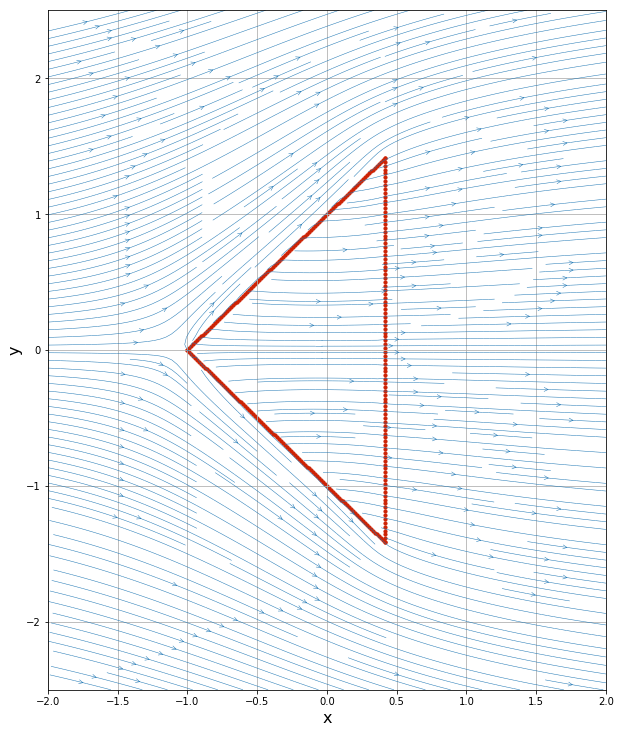

In [179]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, (u), v, density=3, linewidth=0.5, arrowsize=1, arrowstyle='->')
# plot the sources
pyplot.scatter(XX, YY, color='#CD2305', s=10, marker='o')
pyplot.xlim(-2, 2)
pyplot.ylim(-2.5, 2.5)


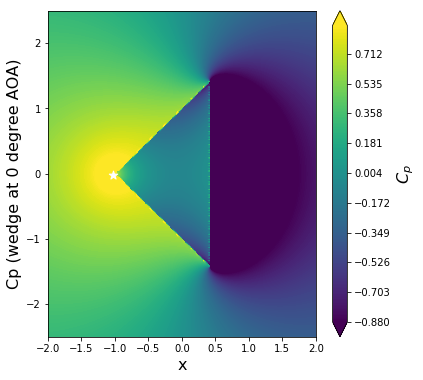

In [180]:
cp1=1-(((u)/(u_inf))**2) #calculating pressure coefficient
size=6
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('Cp (wedge at 0 degree AOA)', fontsize=16)

contf = pyplot.contourf(X, Y, cp1, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cp1.max()
a=numpy.where(cp1==0.99999867771209672)
a
x_maxcp1, y_maxcp1 = numpy.where (cp1 == numpy.max(cp1))
pyplot.scatter(X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp], color = 'white', s=80, marker='*') #star represents the stagnation point

In the image above, Cp (coefficient of pressure) is plotted for wedge at 0 degree AOA. A star can be observed in the image that shows the stagnation point that lies exactly at the sharp edge of the wedge as discussed earlier. Here no lift will be generated due to symetry of flow due to which pressure difference is 0.

Tellez et al article "Evaluating Oblique Shock Waves Characteristics on a Double-Wedge Airfoil" (December, 2016) shows a plot of a wedge airfoil in a supersonic windtunnel under a freestream flow of Mach 1.8 shows the pressure variation in the stream. Here, static pressure increases in the frontal area while the static pressure is decreasing in the real area. This phenomenon can be compared with our plot at 0 deg AOA above. We can observe a similar phenomenon in our above plot. The stagnation point still stays at the apex or the sharp edge of the wedge airfoil. In the figure below, we can also observe the oblique shock formation due to interaction between viscous boundary layer and inviscous flow. In our project, potential flow theory is assumed and hence we donot see shocks due to ignorance of effect of viscosity and boundary layer formation.

Due to symetry in geometry lift produced is 0 as pressure on top and bottom of front faces will be equal and greater than the pressure on top and bottom of rear faces. 

In [3]:
from IPython.display import Image
Image(url='http://html.scirp.org/file/4-8102685x31.png')

## Rotation of the wedge w.r.t to coordinate (-1,0)

Now that we have the wedge coordinates (XX,YY) that were formed before using numpy.append() for 3 different coordinate arrays of their respecitve source sheets, we have obtained a wedge geometry. This entire geometry can be rotated once again using coordinate rotaion matrix (rotating_the_wedge function) by rotating along xhinge and yhinge. The angle we use here is the angle of attack w.r.t to freestream in order to see the changes in the flow parameters and pattern for our analysis.

X_rot, Y_rot are the new coordinates obtained after rotating the wedge by 20 degree angle. The new coordinates are used to calculate the velocity and stream function values.

In [182]:
# Changing angle of attack of the wedge

wedge_rot_x,wedge_rot_y = rotating_the_wedge(XX,YY,xhinge,yhinge,40)#angle of attack of the wedge 2*theta
X_rot = wedge_rot_x + xhinge
Y_rot = wedge_rot_y + yhinge

sources_rot is an empty array that is filled in the loop by passing strength, X_rot and Y_rot values to calculate velocities and stream function.

In [183]:
sources_rot = numpy.empty(300, dtype=object)
for i in range(300):
    sources_rot[i] = Source(strength_source, X_rot[i], Y_rot[i])
    sources_rot[i].velocity(X, Y)
    sources_rot[i].stream_function(X,Y)
u = u_freestream.copy()
v = v_freestream.copy()
psi = psi_free.copy()
for source in sources_rot:
    u += source.u 
    v += source.v 
    psi += source.psi

Now, streamlines are plotted using new coordinates (X_rot, Y_rot). The new plot at Angle of attack = 20degree can be compared with the plot of wedge in freestream at 0 degree AOA. 

Wedge at AOA= 20degree can be observed with a different behavior of streamlines. The area between the streamlines above the wedge is increasing and mrore than the area between streamlines below wedge. The increase in area is due to increase in velocity and mass flow rate. This indicates that flow the wedge is faster than the flow below the wedge. Using pyplot.scatter, the X_rot and Y_rot points are scattered to plot te geometry. 

As we furthur keep increasing the angle of attack the above effect keeps on developing over new plots.


(-2.5, 2.5)

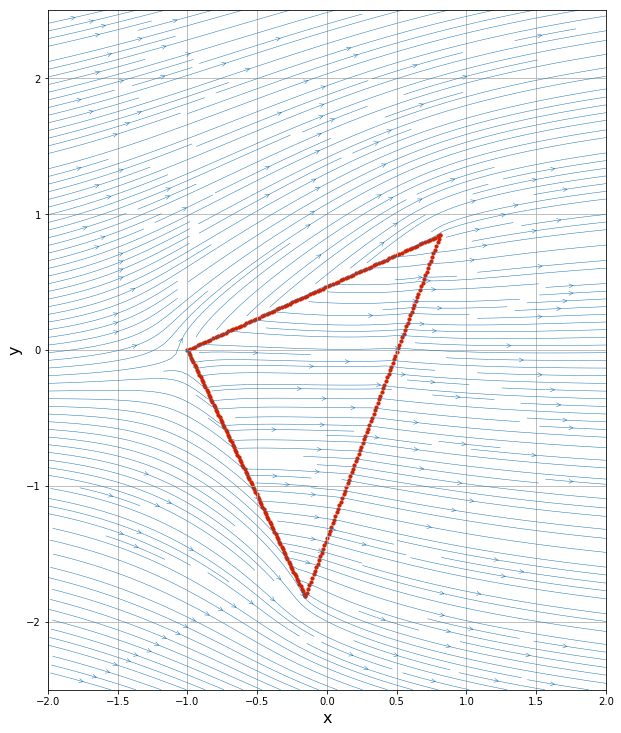

In [184]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, (u), v, density=3, linewidth=0.5, arrowsize=1, arrowstyle='->')
# plot the sources


pyplot.scatter(X_rot, Y_rot, color='#CD2305', s=10, marker='o')
# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
# plot the stagnation point

pyplot.xlim(-2, 2)
pyplot.ylim(-2.5, 2.5)

Now Vortex is added to the geometry above and then the effects will be observed

## Adding Vortex to the flow 

Now, let us add vortex in our flow in order to analyze the changes on the cp graph and the streamplot. Here we have defined a function that carrys formulaes to calculate vortex velocities and stream-function. 

In [185]:
def get_velocity_vortex(strength, xv, yv, X, Y): 
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u1 = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v1 = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u1, v1

In [186]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

As we are now reaching the end of vortex declaration, its time to call the function and calculate the velocities.

In [187]:
gamma= strength_source
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, X_rot, Y_rot, X, Y)
U_final= u_vortex+u
V_final= v_vortex+v
# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, X_rot, Y_rot, X, Y)
psi_total=psi+psi_vortex


Lets observe the streamplot of our wedge that now comprises of vortex+freestream+sources. To observe the geometry of the new rotated wedge the coordinates (X_rot, Y_rot) are passes in the scatter() command. 

In the image below from Kechichian's report (2014) on "An Aerodynamic study of double wedge airfoils in subsonic flow", the wedge at a particular angle of attack and due to circulation this streamline pattern in observed which is similar to our streamline pattern when we add vortex to our wedge.

In [188]:
from IPython.display import Image
Image(url='https://html2-f.scribdassets.com/84w71xu1q84u1qg7/images/14-5151b51876.jpg')

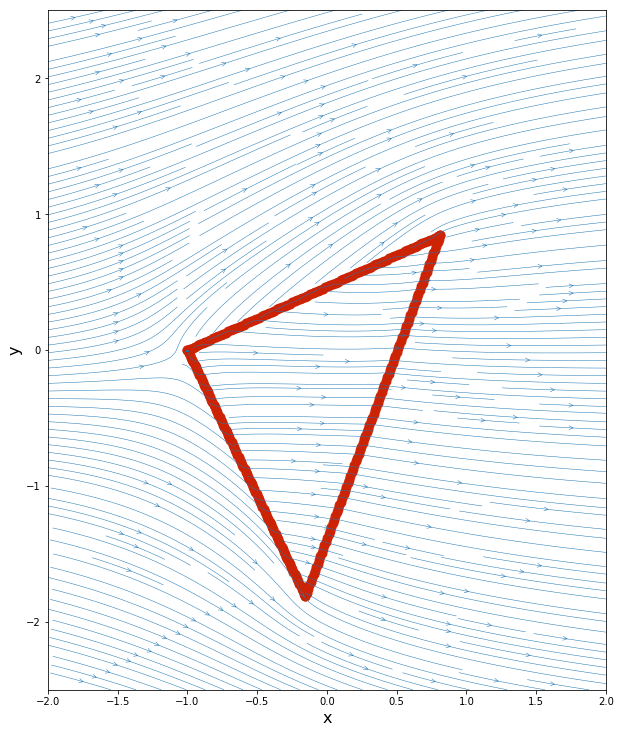

In [189]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, U_final, V_final,
                  density=3, linewidth=0.5, arrowsize=1, arrowstyle='->')
pyplot.scatter(X_rot, Y_rot, color='#CD2305', s=80, marker='o');

(array([149]), array([71]))


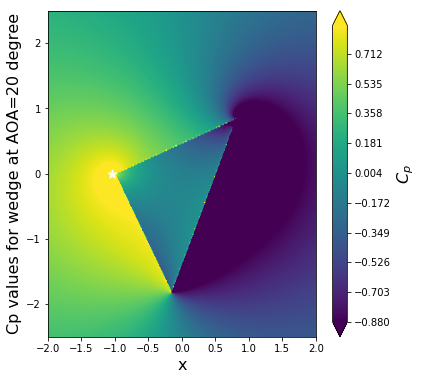

In [190]:
cp=1-(((U_final)/(u_inf))**2)
size=6
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('Cp values for wedge at AOA=20 degree', fontsize=16)

contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cp.max() #max value of Cp
a=numpy.where(cp==0.99999867771209672)
print (a) #location of stagnation point
x_maxcp, y_maxcp = numpy.where (cp == numpy.max(cp))
pyplot.scatter(X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp], color = 'white', s=80, marker='*')

If we analyse both the plots above, we can observe major differences between plots for wedge AOA=0 degree and AOA=20 degree.
The streamlines can be observed curling around the geometry of the wedge due to addition of the vortex. Due to increment in AOA, the streamlines below the wedge tend to keep coming closer and a decrease in their area is observed as compared to increase in the area between the streamplots above wedge. 

Our assumption was that this phenomenon occurs due to increase in pressure in the bottow area and increase in velocity of the air on the above part of wedge. The Cp graph above proves our assumption correct.

Lets change the angle of attack and observe what happens at 45 degree AOA!

## Rotating wedge to 45 degree AOA

In [191]:
wedge_rot_x,wedge_rot_y = rotating_the_wedge(XX,YY,xhinge,yhinge,90)#angle of attack of the wedge 2*theta
X_rot = wedge_rot_x + xhinge
Y_rot = wedge_rot_y + yhinge

In [192]:
sources_rot = numpy.empty(300, dtype=object)
for i in range(300):
    sources_rot[i] = Source(strength_source, X_rot[i], Y_rot[i])
    sources_rot[i].velocity(X, Y)
    sources_rot[i].stream_function(X,Y)
u = u_freestream.copy()
v = v_freestream.copy()
psi = psi_free.copy()
for source in sources_rot:
    u += source.u 
    v += source.v 
    psi += source.psi

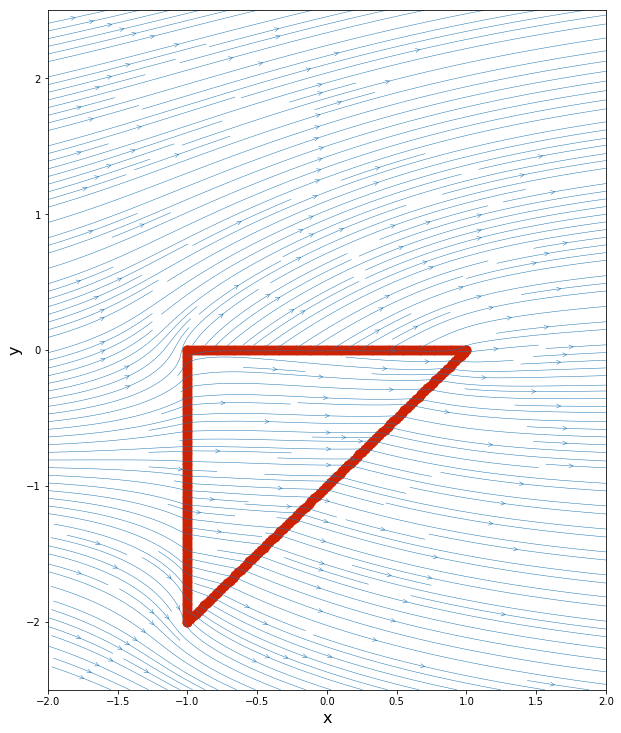

In [193]:
gamma= strength_source
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, X_rot, Y_rot, X, Y)
U_final= u_vortex+u
V_final= v_vortex+v
# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, X_rot, Y_rot, X, Y)
psi_total=psi+psi_vortex
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, U_final, V_final,
                  density=3, linewidth=0.5, arrowsize=1, arrowstyle='->')
pyplot.scatter(X_rot, Y_rot, color='#CD2305', s=80, marker='o');

(array([148]), array([73]))


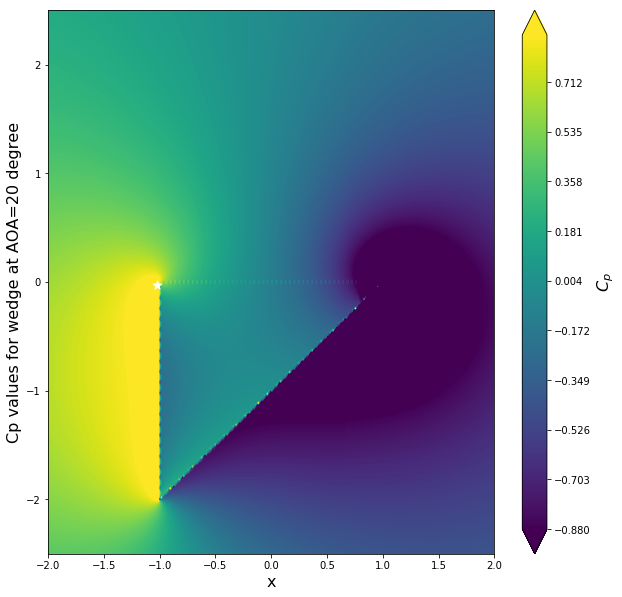

In [194]:
cp=1-(((U_final)/(u_inf))**2)
size=10
pyplot.figure(figsize=(size,size))   #plot for cylinder
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('Cp values for wedge at AOA=20 degree', fontsize=16)

contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.88,0.88,200), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cp.max() #max value of Cp
a=numpy.where(cp==cp.max())
print (a) #location of stagnation point
x_maxcp, y_maxcp = numpy.where (cp == numpy.max(cp))
pyplot.scatter(X[x_maxcp,y_maxcp],Y[x_maxcp,y_maxcp], color = 'white', s=80, marker='*')

Even after changing changing AOA to 45 degree, the stagnation point still remains intact. Here an unusual phenomenon can be observed. As we keep increasing angle of attack the yellow area denoting the high Cp region keeps getting shorter while the purple dark region denoting low cp values keeps getting bigger in area. This phenomenon can be due to wall effect. The surface of the wedge is now acting as a wall to the freestream and deflecting the flow in opposite direction. 

The wedge airfoils are used as supersonic flow airfoils. The are also used in supersonic inlets where Mach no. is very high. Due to sharp edge, drag is reduced and larger speeds can be achieved. Another great application can be observed in the SR71's J58 engine that consists of an inlet cone. It moves back and forward to maintain the shock.

### References

Inviscid Flow Past a Semi-Infinite Wedge. (n.d.). Retrieved from  http://farside.ph.utexas.edu/teaching/336L/Fluidhtml/node76.html

Lift from Pressure-area. Retrieved from https://www.grc.nasa.gov/www/k-12/airplane/right1.html

Pressure coefficient. (2018, April 03). Retrieved from https://en.wikipedia.org/wiki/Pressure_coefficient

Source & Sink in a Freestream, (2018, May 07). Retrieved from  https://jupyter.lai.gwu.edu/user/anmol035/notebooks/AeroPython/lessons/02_Lesson02_sourceSinkFreestream.ipynb
 Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c)2014 Lorena A. Barba,       Olivier Mesnard, 2014.
 
Vortex, (2018, May 07). Retrieved from https://jupyter.lai.gwu.edu/user/anmol035/notebooks/AeroPython/lessons/04_Lesson04_vortex.ipynb
 Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c)2014 Lorena A. Barba,        Olivier Mesnard, 2014.
 
Source sheet, (2018, May 07). Retrieved from https://jupyter.lai.gwu.edu/user/anmol035/notebooks/AeroPython/lessons/08_Lesson08_sourceSheet.ipynb
 Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c)2014 Lorena A. Barba,       Olivier Mesnard, 2014.
 
Lift on a cylinder, (2018, May 07). Retrieved from  https://jupyter.lai.gwu.edu/user/anmol035/notebooks/AeroPython/lessons/06_Lesson06_vortexLift.ipynb
 Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT license. (c)2014 Lorena A. Barba,       Olivier Mesnard, 2014.

Scientific Research Publishing. (2016, December 05). Evaluating Oblique Shock Waves Characteristics on a Double-Wedge Airfoil. Retrieved from http://www.scirp.org/journal/PaperInformation.aspx?PaperID=72924

Great, S. T. (n.d.). An Aerodynamic Study of Double Wedge Airfoils in Subsonic Flow. Retrieved from http://www.academia.edu/17342333/An_Aerodynamic_Study_of_Double_Wedge_Airfoils_in_Subsonic_Flow